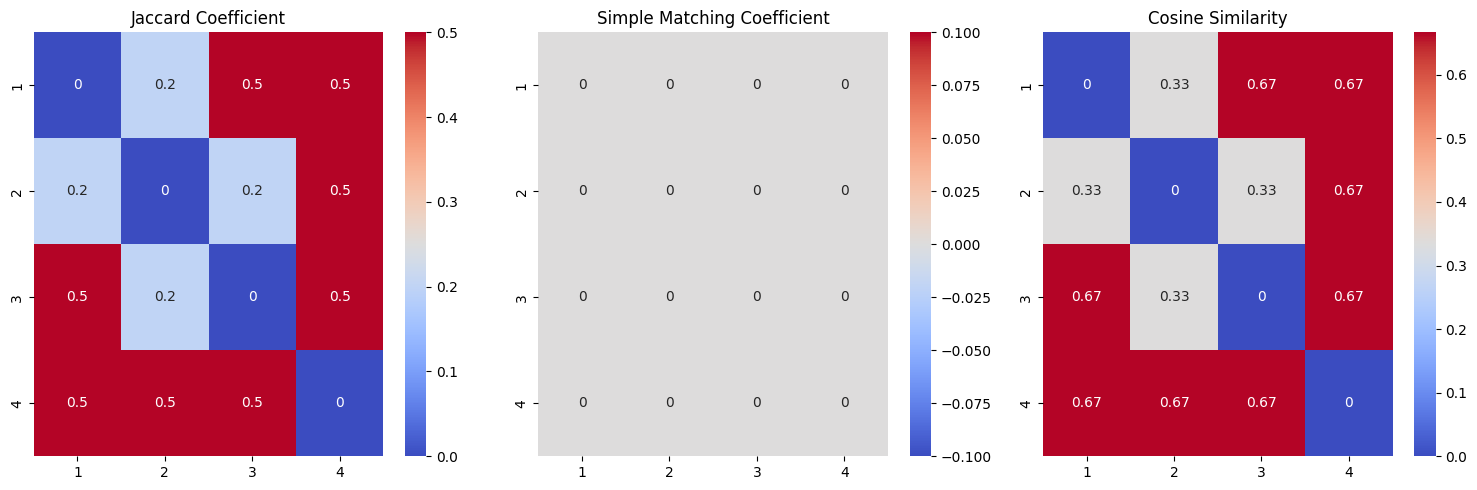

In [1]:
# A10. Cosine Similarity Measure
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity


data = [
    [1, 0, 1, 0, 1],
    [0, 1, 1, 1, 0],
    [1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1],

]


vectors = data[:20]


num_vectors = len(vectors)
jc_matrix = np.zeros((num_vectors, num_vectors))
smc_matrix = np.zeros((num_vectors, num_vectors))
cos_matrix = np.zeros((num_vectors, num_vectors))


for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j:
            jc = jaccard_score(vectors[i], vectors[j])
            jc_matrix[i, j] = jc
            smc = np.mean(vectors[i] == vectors[j])
            smc_matrix[i, j] = smc
            cos = cosine_similarity([vectors[i]], [vectors[j]])[0][0]
            cos_matrix[i, j] = cos

jc_df = pd.DataFrame(jc_matrix, columns=range(1, num_vectors + 1), index=range(1, num_vectors + 1))
smc_df = pd.DataFrame(smc_matrix, columns=range(1, num_vectors + 1), index=range(1, num_vectors + 1))
cos_df = pd.DataFrame(cos_matrix, columns=range(1, num_vectors + 1), index=range(1, num_vectors + 1))


fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.heatmap(jc_df, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Jaccard Coefficient')

sns.heatmap(smc_df, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Simple Matching Coefficient')

sns.heatmap(cos_df, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Cosine Similarity')

plt.tight_layout()
plt.show()


C:\Python\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Python\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


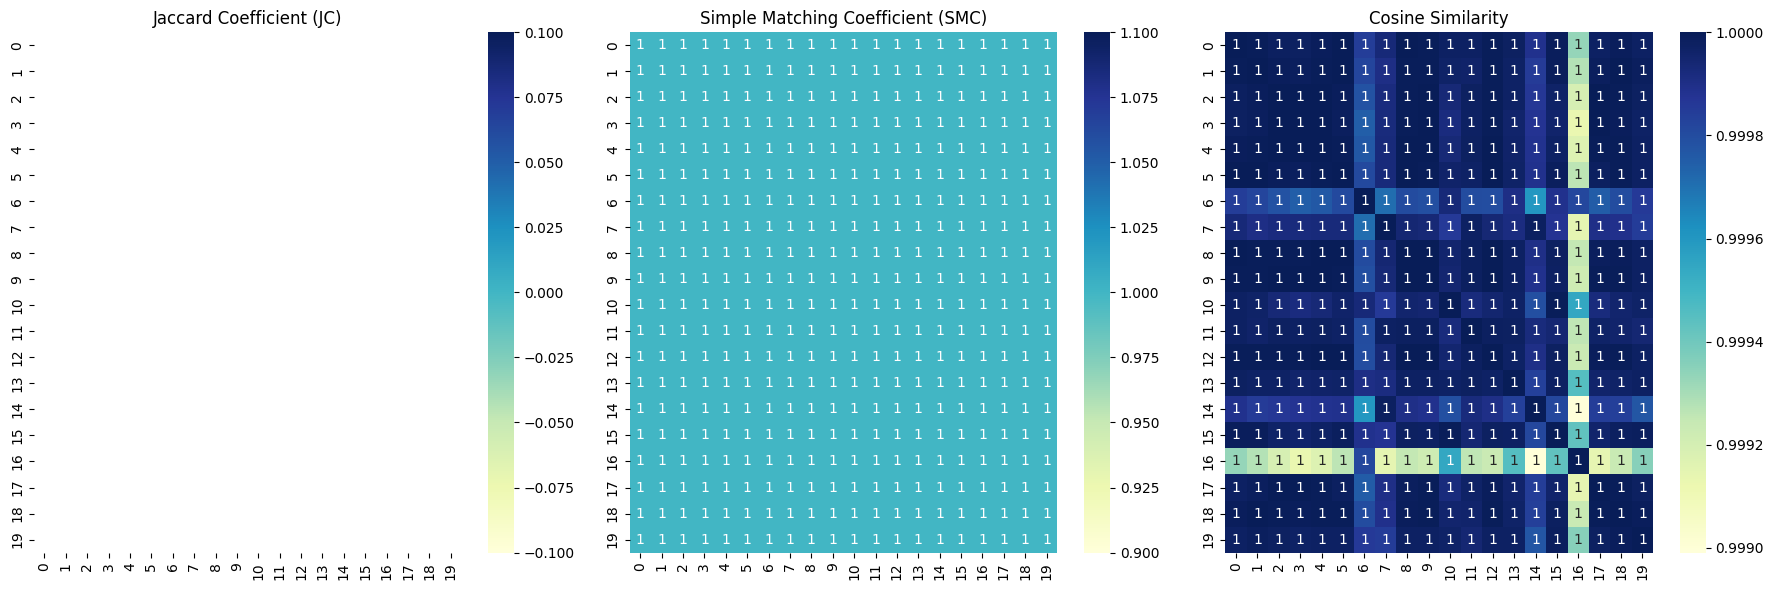

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the file
file_path = 'Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

    # Convert all columns to numeric, forcing errors to NaN (Not a Number)
    df = df.apply(pd.to_numeric, errors='coerce')

    # Fill missing values with 0
    df = df.fillna(0)

    # Extract the first 20 rows
    subset_df = df.head(20)

    # Initialize similarity matrices
    n = subset_df.shape[0]
    jc_matrix = np.zeros((n, n))
    smc_matrix = np.zeros((n, n))
    cosine_matrix = np.zeros((n, n))

    # Calculate Jaccard Coefficient (JC), Simple Matching Coefficient (SMC), and Cosine Similarity
    for i in range(n):
        for j in range(i, n):
            vector1 = subset_df.iloc[i].values
            vector2 = subset_df.iloc[j].values

            # Ensure vectors are binary for Jaccard and SMC
            binary_vector1 = np.where((vector1 == 0) | (vector1 == 1), vector1, np.nan)
            binary_vector2 = np.where((vector2 == 0) | (vector2 == 1), vector2, np.nan)

            # Jaccard Coefficient (JC)
            f11 = np.sum((binary_vector1 == 1) & (binary_vector2 == 1))
            f10 = np.sum((binary_vector1 == 1) & (binary_vector2 == 0))
            f01 = np.sum((binary_vector1 == 0) & (binary_vector2 == 1))
            jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else np.nan
            jc_matrix[i, j] = jc
            jc_matrix[j, i] = jc  # Symmetric matrix

            # Simple Matching Coefficient (SMC)
            f00 = np.sum((binary_vector1 == 0) & (binary_vector2 == 0))
            smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) > 0 else np.nan
            smc_matrix[i, j] = smc
            smc_matrix[j, i] = smc  # Symmetric matrix

            # Cosine Similarity
            norm_vector1 = np.linalg.norm(vector1)
            norm_vector2 = np.linalg.norm(vector2)
            if norm_vector1 > 0 and norm_vector2 > 0:
                cosine_similarity = np.dot(vector1, vector2) / (norm_vector1 * norm_vector2)
            else:
                cosine_similarity = np.nan
            cosine_matrix[i, j] = cosine_similarity
            cosine_matrix[j, i] = cosine_similarity  # Symmetric matrix

    # Plot heatmaps
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.heatmap(jc_matrix, annot=True, cmap='YlGnBu', ax=axes[0], mask=np.isnan(jc_matrix))
    axes[0].set_title('Jaccard Coefficient (JC)')

    sns.heatmap(smc_matrix, annot=True, cmap='YlGnBu', ax=axes[1], mask=np.isnan(smc_matrix))
    axes[1].set_title('Simple Matching Coefficient (SMC)')

    sns.heatmap(cosine_matrix, annot=True, cmap='YlGnBu', ax=axes[2], mask=np.isnan(cosine_matrix))
    axes[2].set_title('Cosine Similarity')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


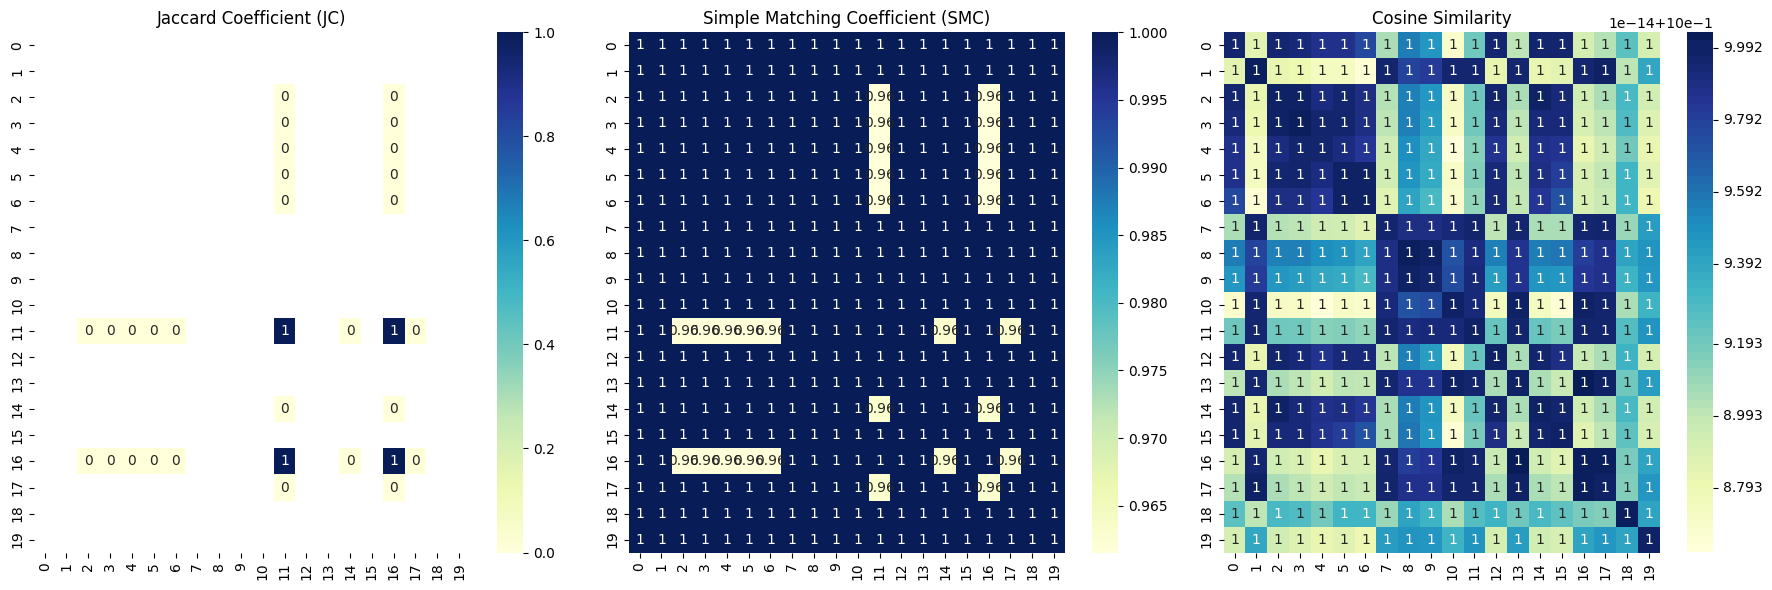

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the file
file_path = 'Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Convert all columns to numeric, forcing errors to NaN (Not a Number)
    df = df.apply(pd.to_numeric, errors='coerce')

    # Fill missing values with 0
    df = df.fillna(0)

    # Extract the first 20 rows
    subset_df = df.head(20)

    # Initialize similarity matrices
    n = subset_df.shape[0]
    jc_matrix = np.zeros((n, n))
    smc_matrix = np.zeros((n, n))
    cosine_matrix = np.zeros((n, n))

    # Calculate Jaccard Coefficient (JC), Simple Matching Coefficient (SMC), and Cosine Similarity
    for i in range(n):
        for j in range(i, n):
            vector1 = subset_df.iloc[i].values
            vector2 = subset_df.iloc[j].values

            # Jaccard Coefficient (JC) for binary attributes
            binary_cols = (vector1 == 0) | (vector1 == 1)  # Ensure columns are binary
            f11 = np.sum((vector1[binary_cols] == 1) & (vector2[binary_cols] == 1))
            f10 = np.sum((vector1[binary_cols] == 1) & (vector2[binary_cols] == 0))
            f01 = np.sum((vector1[binary_cols] == 0) & (vector2[binary_cols] == 1))
            jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else float('nan')
            jc_matrix[i, j] = jc
            jc_matrix[j, i] = jc  # Symmetric matrix

            # Simple Matching Coefficient (SMC) for binary attributes
            f00 = np.sum((vector1[binary_cols] == 0) & (vector2[binary_cols] == 0))
            smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) > 0 else float('nan')
            smc_matrix[i, j] = smc
            smc_matrix[j, i] = smc  # Symmetric matrix

            # Cosine Similarity
            dot_product = np.dot(vector1, vector2)
            norm_vector1 = np.linalg.norm(vector1)
            norm_vector2 = np.linalg.norm(vector2)
            cosine_similarity = dot_product / (norm_vector1 * norm_vector2) if norm_vector1 > 0 and norm_vector2 > 0 else float('nan')
            cosine_matrix[i, j] = cosine_similarity
            cosine_matrix[j, i] = cosine_similarity  # Symmetric matrix

    # Plot heatmaps
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.heatmap(jc_matrix, annot=True, cmap='YlGnBu', ax=axes[0])
    axes[0].set_title('Jaccard Coefficient (JC)')

    sns.heatmap(smc_matrix, annot=True, cmap='YlGnBu', ax=axes[1])
    axes[1].set_title('Simple Matching Coefficient (SMC)')

    sns.heatmap(cosine_matrix, annot=True, cmap='YlGnBu', ax=axes[2])
    axes[2].set_title('Cosine Similarity')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")
